In [3]:
!pip install transformers diffusers torch matplotlib pillow

In [5]:
import transformers
import diffusers
import torch
import matplotlib
import PIL

print(f"transformers version: {transformers.__version__}")
print(f"diffusers version: {diffusers.__version__}")
print(f"torch version: {torch.__version__}")
print(f"matplotlib version: {matplotlib.__version__}")
print(f"pillow version: {PIL.__version__}")

transformers version: 4.47.1
diffusers version: 0.31.0
torch version: 2.5.1+cu121
matplotlib version: 3.8.0
pillow version: 11.0.0


In [77]:
# Import necessary libraries
import torch
from diffusers import StableDiffusionPipeline
from transformers import CLIPProcessor, CLIPModel
import time
from PIL import Image
import matplotlib.pyplot as plt


In [78]:
# Function to load the Stable Diffusion pipeline
def load_model_cpu(model_id="runwayml/stable-diffusion-v1-5"):
    """
    Load the Stable Diffusion model optimized for CPU usage.
    Args:
        model_id (str): Model ID from Hugging Face repository.
    Returns:
        pipe (StableDiffusionPipeline): Loaded Stable Diffusion pipeline for CPU.
    """
    pipe = StableDiffusionPipeline.from_pretrained(
        model_id,
        torch_dtype=torch.float32  # Use float32 for CPU
    )
    pipe.to("cpu")  # Ensure model runs on CPU
    return pipe

In [79]:
# Function to generate an image
def generate_image(pipe, prompt, num_inference_steps=25, guidance_scale=7.5, height=384, width=384):
    """
    Generate an image using the Stable Diffusion pipeline on CPU.
    Args:
        pipe (StableDiffusionPipeline): Loaded Stable Diffusion pipeline.
        prompt (str): Text prompt for image generation.
        num_inference_steps (int): Number of diffusion steps.
        guidance_scale (float): Scale for prompt adherence.
        height (int): Height of the output image.
        width (int): Width of the output image.
    Returns:
        generated_image (PIL.Image): Generated image.
        inference_time (float): Time taken for inference.
    """
    start_time = time.time()
    output = pipe(
        prompt,
        num_inference_steps=num_inference_steps,
        guidance_scale=guidance_scale,
        height=height,
        width=width
    )
    inference_time = time.time() - start_time
    generated_image = output.images[0]
    return generated_image, inference_time

In [80]:
# Function to evaluate the image using CLIP
def evaluate_image(prompt, generated_image, clip_model, clip_processor):
    """
    Evaluate the generated image using CLIP score.
    Args:
        prompt (str): Input text prompt.
        generated_image (PIL.Image): Generated image.
        clip_model (CLIPModel): Loaded CLIP model.
        clip_processor (CLIPProcessor): Processor for CLIP model.
    Returns:
        clip_score (float): CLIP score indicating text-image similarity.
    """
    inputs = clip_processor(text=[prompt], images=generated_image, return_tensors="pt", padding=True)
    outputs = clip_model(**inputs)
    logits_per_text = outputs.logits_per_text  # Text-to-image similarity scores
    clip_score = logits_per_text.softmax(dim=1)[0, 0].item()  # Normalize and extract score
    return clip_score

In [81]:
# Function to display the image using matplotlib
def display_image_with_matplotlib(image, title="Generated Image"):
    """
    Display the generated image using matplotlib.
    Args:
        image (PIL.Image): The generated image.
        title (str): Title of the plot.
    """
    plt.figure(figsize=(6, 6))  # Set figure size
    plt.imshow(image)
    plt.axis("off")  # Hide axes
    plt.title(title)  # Set title
    plt.show()


Loading models for CPU...


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Generating image...


  0%|          | 0/15 [00:00<?, ?it/s]

Evaluating image...
Inference Time (CPU): 1051.65 seconds
CLIP Score: 1.0000
Displaying the image using matplotlib...


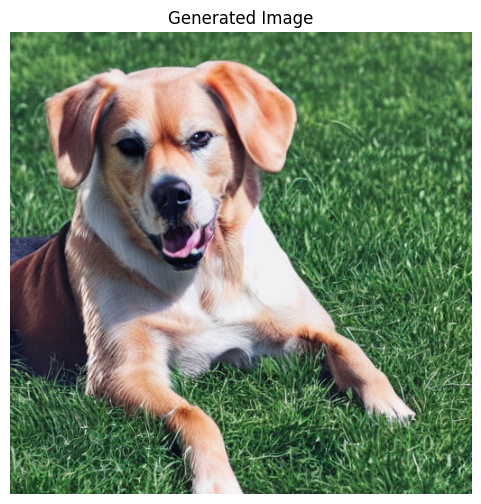

In [85]:
# Main execution
if __name__ == "__main__":
    # Load models
    print("Loading models for CPU...")
    stable_diffusion_pipe = load_model_cpu()
    clip_model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32").to("cpu")
    clip_processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

    # Define the prompt
    prompt_text = "A dog lying on a grass"

    # Generate image with optimized parameters
    print("Generating image...")
    generated_img, inference_duration = generate_image(
        stable_diffusion_pipe,
        prompt_text,
        num_inference_steps=15,  # Fewer steps for faster output
        height=512,              # Lower resolution for speed
        width=512
    )

    # Evaluate image
    print("Evaluating image...")
    clip_similarity_score = evaluate_image(prompt_text, generated_img, clip_model, clip_processor)

    # Display metrics
    print(f"Inference Time (CPU): {inference_duration:.2f} seconds")
    print(f"CLIP Score: {clip_similarity_score:.4f}")

    # Display the image using matplotlib
    print("Displaying the image using matplotlib...")
    display_image_with_matplotlib(generated_img)

Loading models for CPU...


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Generating image...


  0%|          | 0/15 [00:00<?, ?it/s]

Evaluating image...
Inference Time (CPU): 1033.26 seconds
CLIP Score: 1.0000
Displaying the image using matplotlib...


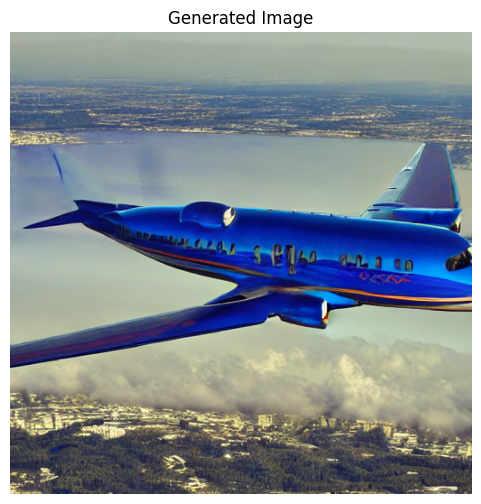

In [87]:
# Main execution
if __name__ == "__main__":
    # Load models
    print("Loading models for CPU...")
    stable_diffusion_pipe = load_model_cpu()
    clip_model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32").to("cpu")
    clip_processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

    # Define the prompt
    prompt_text = "An airplane flying in a blue sky"

    # Generate image with optimized parameters
    print("Generating image...")
    generated_img, inference_duration = generate_image(
        stable_diffusion_pipe,
        prompt_text,
        num_inference_steps=15,  # Fewer steps for faster output
        height=512,              # Lower resolution for speed
        width=512
    )

    # Evaluate image
    print("Evaluating image...")
    clip_similarity_score = evaluate_image(prompt_text, generated_img, clip_model, clip_processor)

    # Display metrics
    print(f"Inference Time (CPU): {inference_duration:.2f} seconds")
    print(f"CLIP Score: {clip_similarity_score:.4f}")

    # Display the image using matplotlib
    print("Displaying the image using matplotlib...")
    display_image_with_matplotlib(generated_img)